In [2]:
import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from MNIST_Dataset_Loader.mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [3]:
data = MNIST('./MNIST_Dataset_Loader/dataset/')

In [4]:
print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)


Loading Training Data...


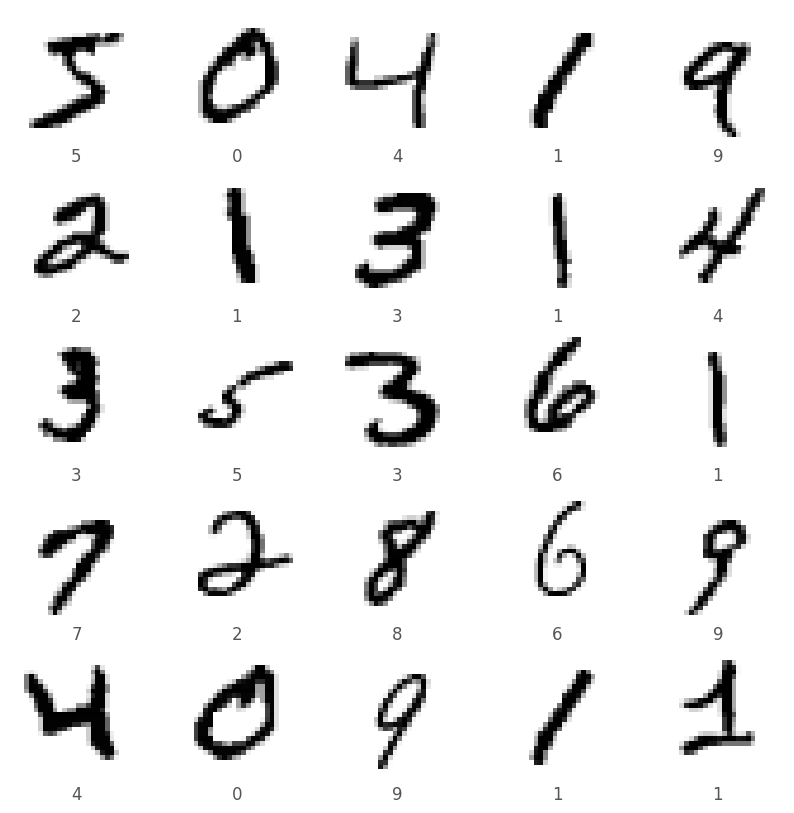

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = train_img[i].reshape(28, 28)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [6]:
print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


Loading Testing Data...


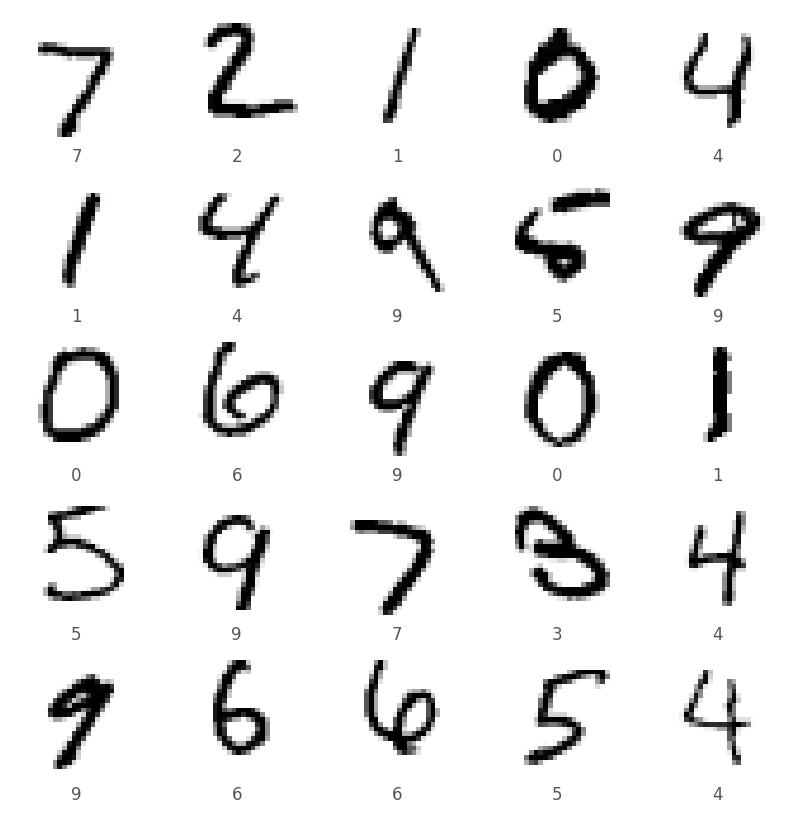

In [7]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = test_img[i].reshape(28, 28)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])
plt.show()

In [8]:
X = train_img

In [9]:
y = train_labels

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)

In [11]:
clf = KNeighborsClassifier(n_neighbors=5,algorithm='auto',n_jobs=10)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=10)

In [12]:
with open('MNIST_KNN.pickle','wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_KNN.pickle','rb')
clf = pickle.load(pickle_in)

In [13]:
confidence = clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test,y_pred)

print('\nKNN Trained Classifier Confidence: ',confidence)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)


KNN Trained Classifier Confidence:  0.971

Predicted Values:  [0 5 6 ... 7 5 7]

Accuracy of Classifier on Validation Image Data:  0.971

Confusion Matrix: 
 [[554   0   1   0   0   0   1   0   0   1]
 [  0 689   0   0   0   0   0   3   0   0]
 [  3   2 561   3   0   0   0   9   1   0]
 [  0   2   7 597   0   5   0   6   2   5]
 [  0   6   0   0 547   0   1   0   0  14]
 [  1   1   1   2   0 525   9   0   0   3]
 [  3   3   0   0   1   2 590   0   0   0]
 [  0   6   0   0   1   0   0 622   0   6]
 [  2   0   3  11   5  15   2   0 564   6]
 [  1   2   1   1   6   1   0   6   1 577]]


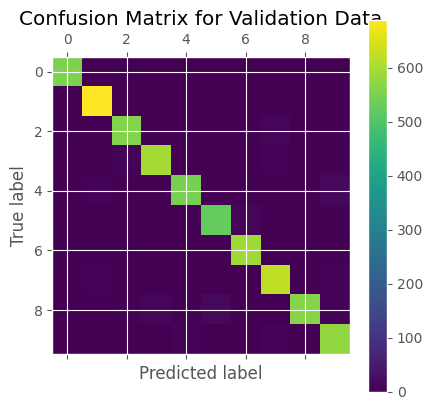

In [14]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
test_labels_pred = clf.predict(test_img)

In [16]:
acc = accuracy_score(test_labels,test_labels_pred)

In [17]:
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

In [18]:
print('\nPredicted Labels for Test Images: ',test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ',acc)
print('\nConfusion Matrix for Test Data: \n',conf_mat_test)


Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9692

Confusion Matrix for Test Data: 
 [[ 975    1    1    0    0    0    1    1    1    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    9  989    2    1    0    1   15    4    0]
 [   0    3    2  978    1   12    1    7    3    3]
 [   2    7    0    0  947    0    4    1    1   20]
 [   6    0    0   13    1  861    4    1    2    4]
 [   5    4    0    0    3    3  943    0    0    0]
 [   0   23    3    0    3    0    0  988    0   11]
 [   6    3    5   11    6   15    4    6  913    5]
 [   6    6    2    8    6    2    1   11    2  965]]


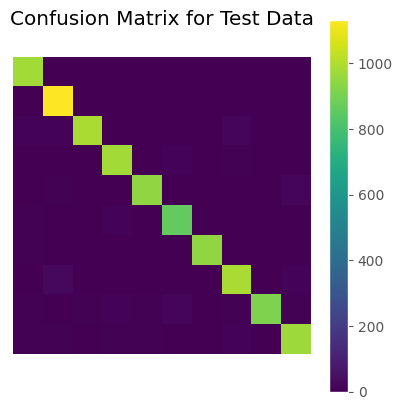

In [19]:
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()


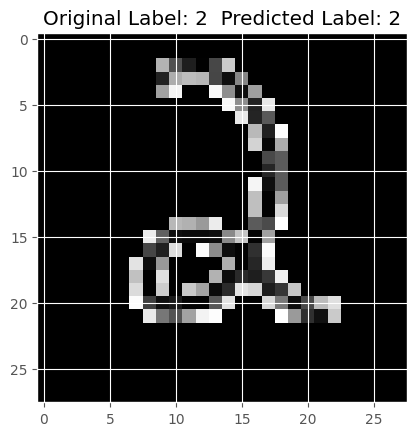

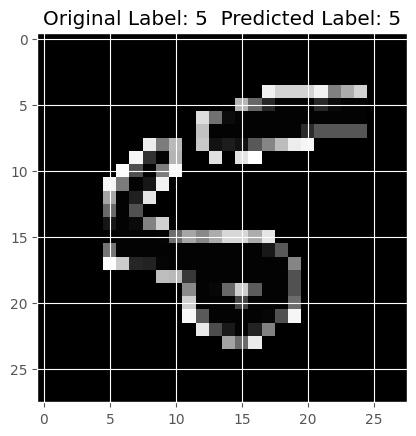

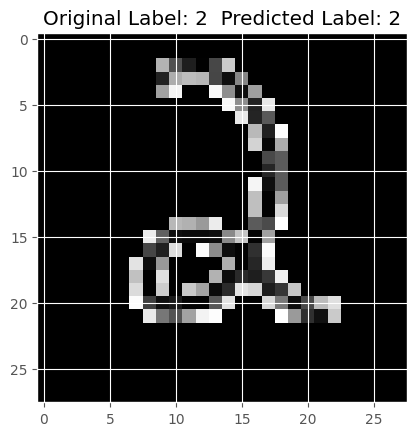

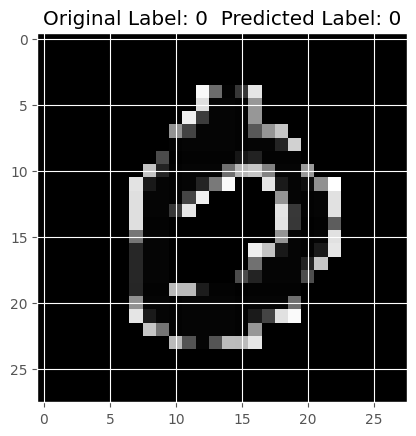

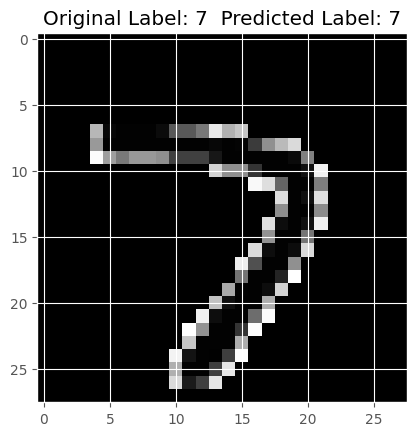

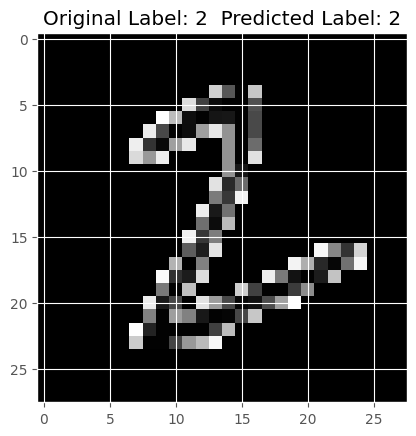

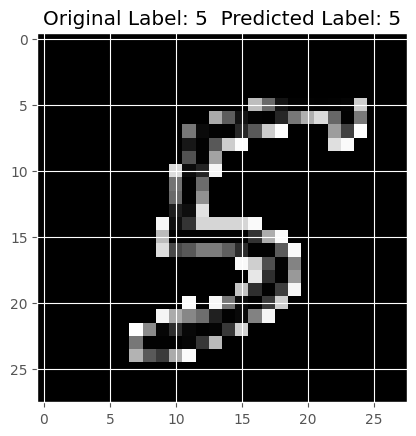

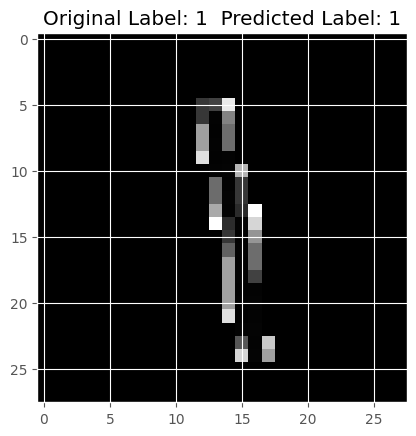

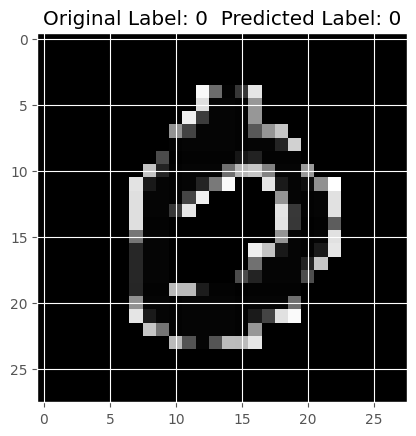

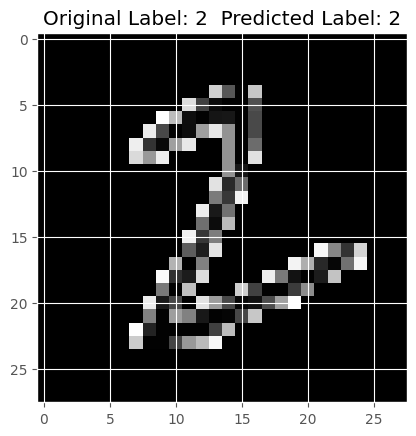

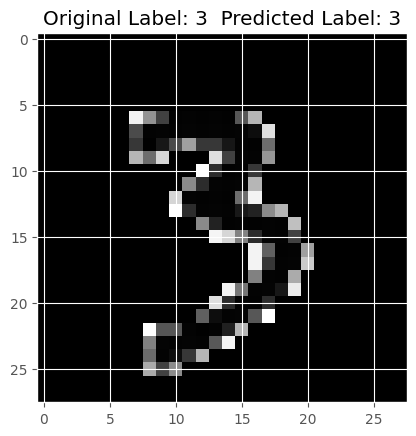

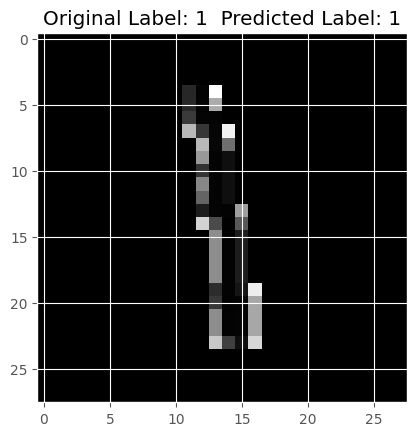

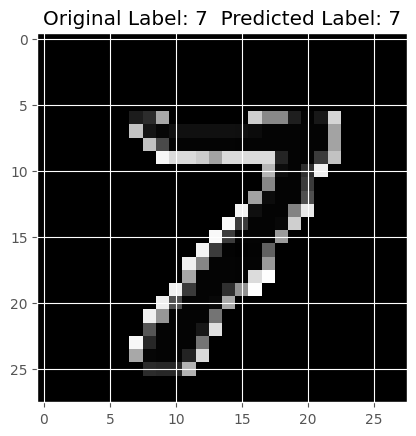

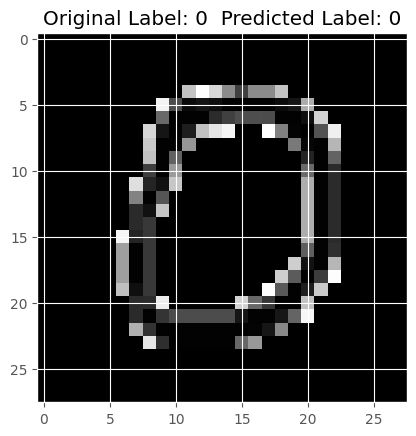

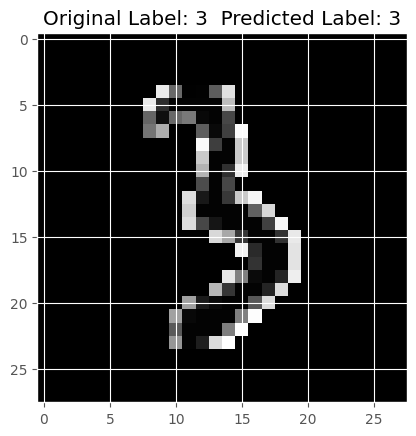

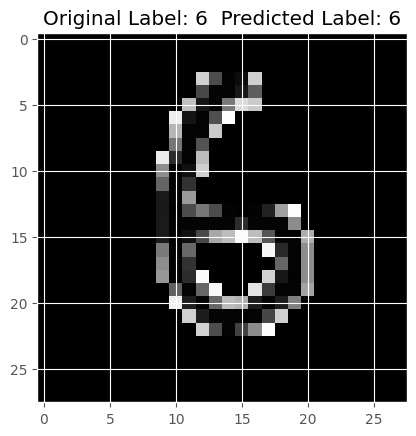

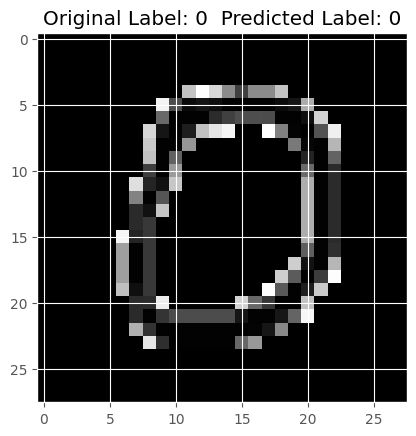

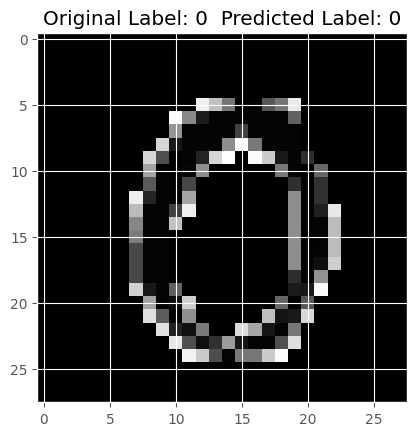

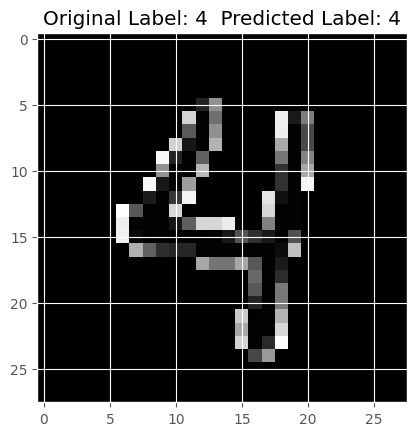

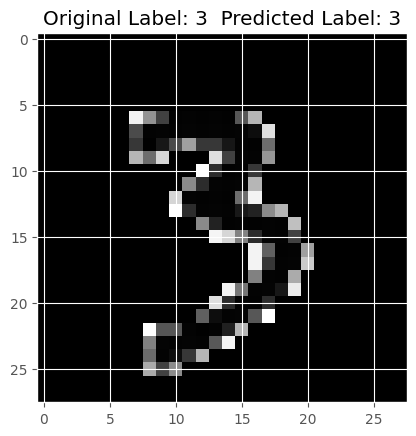

In [20]:
a = np.random.randint(1,50,20)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()